# Interpolációk

## Általánosan az interpolációkról

Az interpolációk alapfeladata az, hogy egy $f(x)$ függvény felvett értékeit különböző $x_1, x_2 x_3 \dots x_n$ pontokban ismerjük az $[a,b](a=x_1, b=x_n)$ intervallumban és magát az $f$ függvényt szeretnénk közelíteni egy könnyen számolható $h(x)$ függvénnyel, amelyre fenáll, hogy $f(x_i)=h(x_i)$.
Az ${x_i}_{i=1}^n$ pontokat interpolációs alappontoknak, a feltételt interpolációs feltételnek nevezzük. Az interpolációs feltétel teljesülése esetén azt reméljük, hogy az interpoláló $h(x)$ függvény jól közelíti az $f(x)$ függvényt az $[x_i,x_i+1]$ intervallumokban. Itt a Lagrange, Hermit és Spline interpolációkról fogok elsősorban írni.

Legegyszerűbben interpolációt ai `interp1d` metódussal tudunk végre hajtani. ez a metódus nem kér csak $x,y$ értékeket és a interpoláció módját. A metódus a scipy.interpolate csomagban található meg.

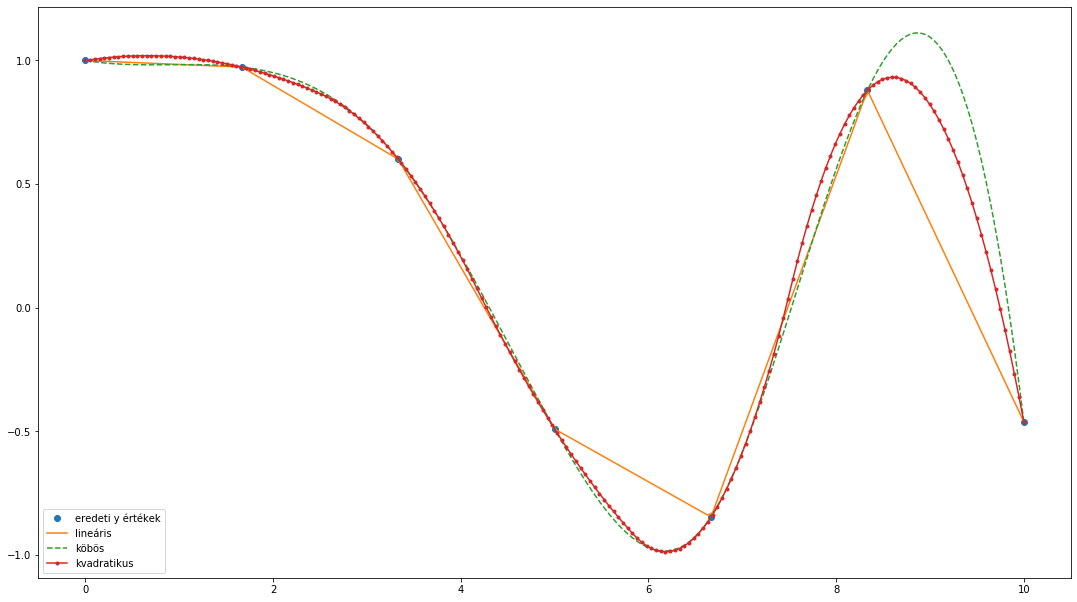

In [57]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


x = np.linspace(0, 10, num=7, endpoint=True)
y = np.cos(-x**2/12)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
f3 = interp1d(x, y, kind='quadratic')
xnew = np.linspace(0, 10, num=200, endpoint=True)

plt.figure(figsize=(18.5, 10.5))
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), '.-')
plt.legend(['eredeti y értékek', 'lineáris', 'köbös', 'kvadratikus'], loc='best')
plt.show()

Látható az `interp1d` egy függvénnyel tér vissza aminek csak meg kell adnunk az $x$ értékeinket és vissza adja az eredményt. Ezek használhatóak a legkönnyebben pythonban. fontos, hogy miután elvégeztük az interpolációt adott pontokra a függvénynek azonos intervallumon de több alpontot tartalmazó tömböt adjunk át kirajzolásnál, hogy szépen és pontosan rajzolja ki a közelítő függvénytés.

Míg az `interp1d` $y=f(x)$ típusú függvényeket interpolál addig ennek a metódusnak a párja az `interp2d` már az $z=f(x, y)$ tipusú egyenleteket tudja közelíteni. használata az `interp1d`-hez hasonló.

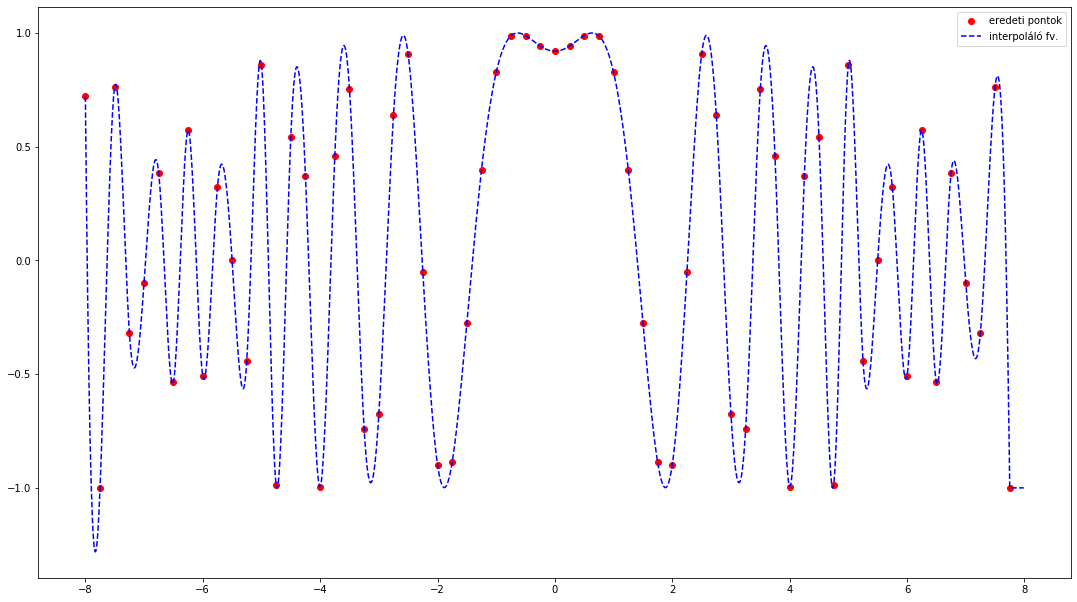

In [25]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from matplotlib import figure

x = np.arange(-8, 8, 0.25)
y = np.arange(-8, 8, 0.25)
xx, yy = np.meshgrid(x, y) #rácsra helyezzük az adatokat
z = np.sin(xx**2+yy**2)
f = interpolate.interp2d(x, y, z, kind='cubic')


xnew = np.arange(-8, 8, 1e-2) # rovábbi alpontok a pontoss kirajzoláshoz
ynew = np.arange(-8, 8, 1e-2)
znew = f(xnew, ynew)

plt.figure(figsize=(18.5,10.5))
plt.plot(x, z[0, :], 'ro', xnew, znew[0, :], 'b--')
plt.legend(["eredeti pontok", "interpoláló fv."])
plt.show()

Másik egyszerűen használható metódus a numpy csomagban található `interp1d`. Az `interp1d` esetében meg kell adni az $x$ és $y$ értékeinket illetve egy olyan intervallumot az $[a,b]$ intervallumon ami több alpontot tartalmaz. A megadott alpontok számától függ a pontosság tehát lehetőleg elég sokat adjunk meg. Az `interp1d` szakaszokra ad meg lineáris interpolácót.  

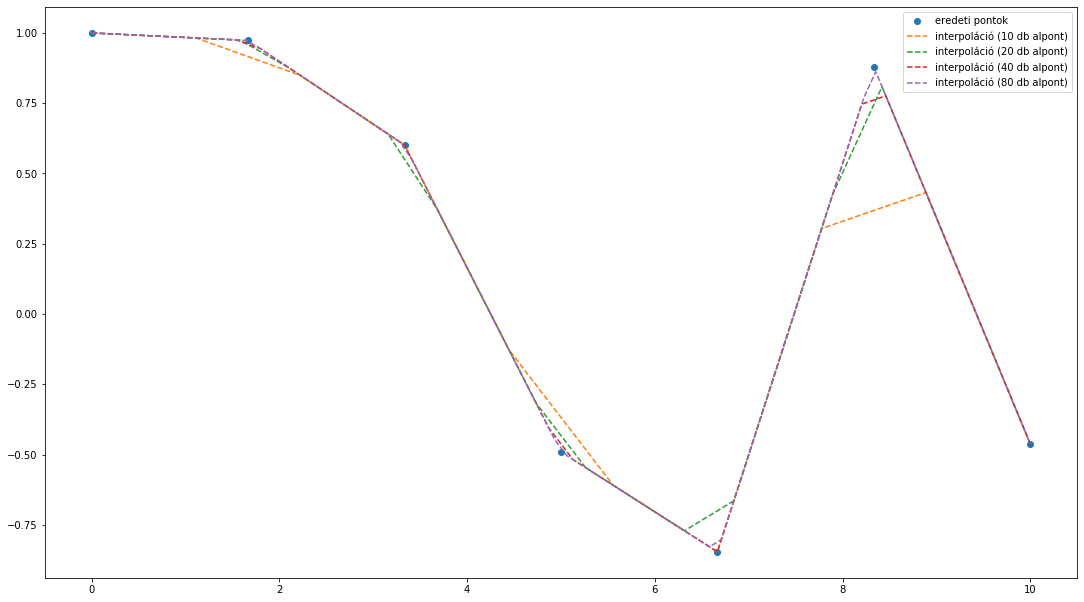

In [21]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

x = np.linspace(0, 10, num=7, endpoint=True)
y = np.cos(-x**2/12)
xnew1 = np.linspace(0, 10, num=10, endpoint=True)
xnew2 = np.linspace(0, 10, num=20, endpoint=True)
xnew3 = np.linspace(0, 10, num=40, endpoint=True)
xnew4 = np.linspace(0, 10, num=80, endpoint=True)
yinterp1 = np.interp(xnew1, x, y)
yinterp2 = np.interp(xnew2, x, y)
yinterp3 = np.interp(xnew3, x, y)
yinterp4 = np.interp(xnew4, x, y)

plt.figure(figsize=(18.5, 10.5))
plt.plot(x, y,'o', xnew1, yinterp1, '--',xnew2, yinterp2, '--',xnew3, yinterp3, '--',xnew4, yinterp4, '--')
plt.legend(["eredeti pontok","interpoláció (10 db alpont)", "interpoláció (20 db alpont)", "interpoláció (40 db alpont)", "interpoláció (80 db alpont)"])
plt.show()


## Lagrange interpoláció 

Legyenek a $\phi_i$ bázisfüggvények a következők $\phi_1=1, \phi_2=x, \dots , \phi_n=x^{n-1}$ és legyenek $x_1, x_2,\dots, x_n$ alpontjaink és $y_i=f(x_i)$ az alpontokhoz tartozó függvény értékek. Ekkor a feladatunk az, hogy határozzuk meg a legfeljebb n-1-ed fokú $p$ polinomot amelyre igaz, hogy $p(x_i)=y_i$. Ez tulajdonképpen az alapfeladat a lényegi rész az, hogy ezt a $p$ polinomot hogyan állítjuk elő. A Lagrange féle előállítás a következőképpen néz ki: 

$$
l_i(x)=\prod_{k=1, k\neq i}^n\frac{x-x_k}{x_i-x_k}
$$
Majd ezekhez az $l_i$ értékeket megszorozzuk a $y_i$ értékeket és megkapjuk a $p$ polinomot.
$$
p(x)=\sum_{i=1}^n y_il_i(x)
$$

Ezáltal meg kapjuk az $f(x)$ függvényünk közelítését a $p(x)$ polinom által. ($f(x) \approx p(x)$)

Pythonban a scipy.interpolate csomag `lagrange` függvényével tudunk a lagrange interpolációt számolni. Figyelni kall hogy egy poly nevű változóba tér vissza.

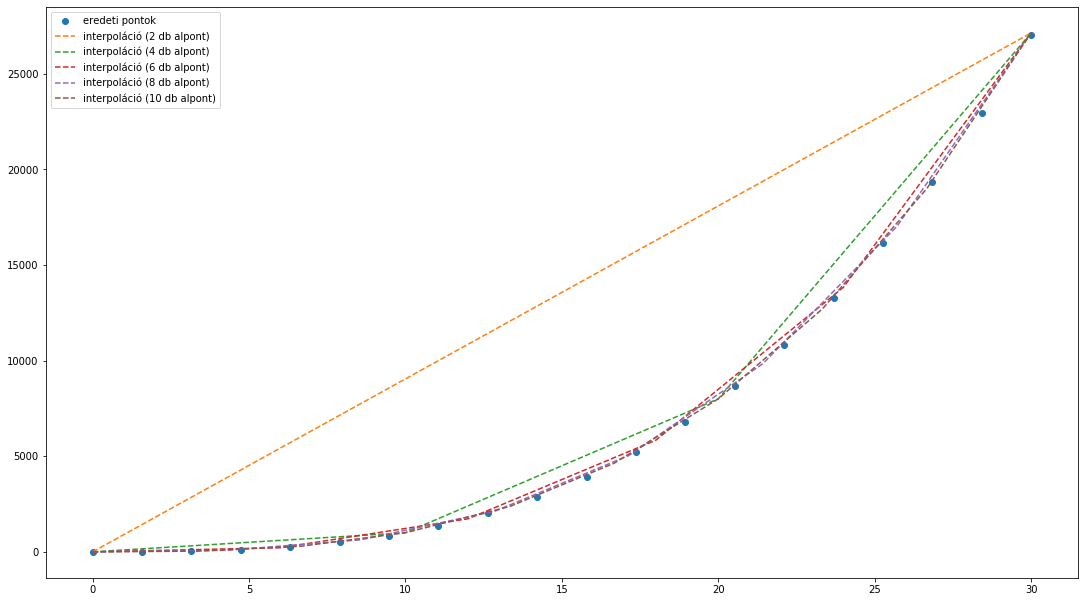

In [9]:
import numpy as np
from scipy.interpolate import lagrange

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

x = np.linspace(0, 30, num=20, endpoint=True)
y = x**3
poly=lagrange(x,y)
xnew1 = np.linspace(0, 30, num=2, endpoint=True)
xnew2 = np.linspace(0, 30, num=4, endpoint=True)
xnew3 = np.linspace(0, 30, num=6, endpoint=True)
xnew4 = np.linspace(0, 30, num=8, endpoint=True)
xnew5 = np.linspace(0, 30, num=10, endpoint=True)


plt.figure(figsize=(18.5, 10.5))
plt.plot(x, y, 'o', xnew1, poly(xnew1),'--', xnew2, poly(xnew2),'--', xnew3, poly(xnew3),'--', xnew4, poly(xnew4),'--', xnew5, poly(xnew5),'--')
plt.legend(["eredeti pontok","interpoláció (2 db alpont)", "interpoláció (4 db alpont)", "interpoláció (6 db alpont)", "interpoláció (8 db alpont)", "interpoláció (10 db alpont)"])
plt.show()



Látszik a pontosság itt is fögg a megadott alpontok számától. Bár a lagrange interpolációnak létezik pythonos implementációja numerikusan unstabil ezért ha mindenféleképpen ezt szeretnénk használni érdemesebb a saját implementációnkat elkészíteni.

## Spline interpoláció

Spline interpoláció esetén is megvannak az $x_i$ pontjaink és $y_i$ függvényértékeink és ezek mellett keressük azt az $S(x)$ függvényt mely teljesíti az alábbi feltételeket:
$$
S(x)= S_i(x)\quad x\in[x_i, x_{i+1}]\\
S(x_i)= y_i\quad (i=1, \dots, n)\\
S_i(x_{i+1})= S_{i+1}(x_{i+1})\quad (i=1, \dots, n-2)\\
$$

Az első feltétel megfogalmazza,hogy szakaszokból áll a függvényünk, a második megmondja, hogy valóban interpoláló függvény az $S(x)$ függvényünk és a harmadikkal a folytonosság van definiálva az $[a,b]$ intervallumon.

A spline meghatározásánál felírunk $n$ darab $k$-ad fokú polinomot ebből látszik, hogy az ismeretlenek száma $n(k+1)$. Az első és a harmadik feltételből következik az, hogy a feltételek száma $(k+1)n-(k-1)$,  ugyanis $k-1$ db simasági feltétel a $n-1$ belső pontban ebből jön az, hogy $(n-1)(k-1)$ és $2n$ interpolációs feltétel. Összesen $(n-1)(k-1)+2n=(k+1)n-(k-1)$ és ebből látszik, hogy hiányzik a spline egyértelműségéhez még $k-1$ darab feltétel. Ezeket a végpontokra szokták megadni.

Vegyük először a lineáris spline interpolációt ebben az esetben a $k=1$ és a három feltétel egyértelműen meghatározza. Minden $[x_k, x_{k+1}]$ intervallumon:
$$
S_k(x_k)=a_kx_k+b_k=y_k \\
S_k(x_{k+1})=a_kx_{k+1}+b_k=y_{k+1}\\
$$
Ebből a kétismeretlenes egyenletrendszerből meghtározható $a_k$ és $b_k$.

Beszélhetünk még kvadratikus splineokról is ebben az esetben $k=2$ és $k-1 = 1$ feltétel hiányzik a spline egyértelmű felírásához. Ezt a  feltételt általában az intervallum elején vagy végén a derivált megadásával szokás teljesíteni. Az így felvázolt esetben az egymás melletti intervallumokra Hermite interpolációt alkalmazva meghatározható a spline.

Gyakorlatban azonban a harmadfokú spline interpolációt használjuk túlnmyómó részt és csak harmadfokú splineról beszélünk, viszont ezek további feltételek felírását követelik meg:
$$
S_i'(x_{i+1})= S_{i+1}'(x_{i+1})\quad (i=1, \dots, n-2)\\
S_i''(x_{i+1})= S_{i+1}''(x_{i+1})\quad (i=1, \dots, n-2)\\
S''(x_{1})= A_n \quad \textrm{és} \quad S''(x_{n})=B_n
$$

Pythonban használhatjuk a harmadfokú splinet is ehez elő kell készíteni a scipy.interpolate csomagban megtalálható `splprep` metódussal majd utána tudjuk használni a `splev` metódust ami a harmadfokó splinet adja vissza.

Először vegyünk egy függvényt és pár alpontot legyen most ez a sinus függvény és próbáljuk ezt közelíteni spline-al.

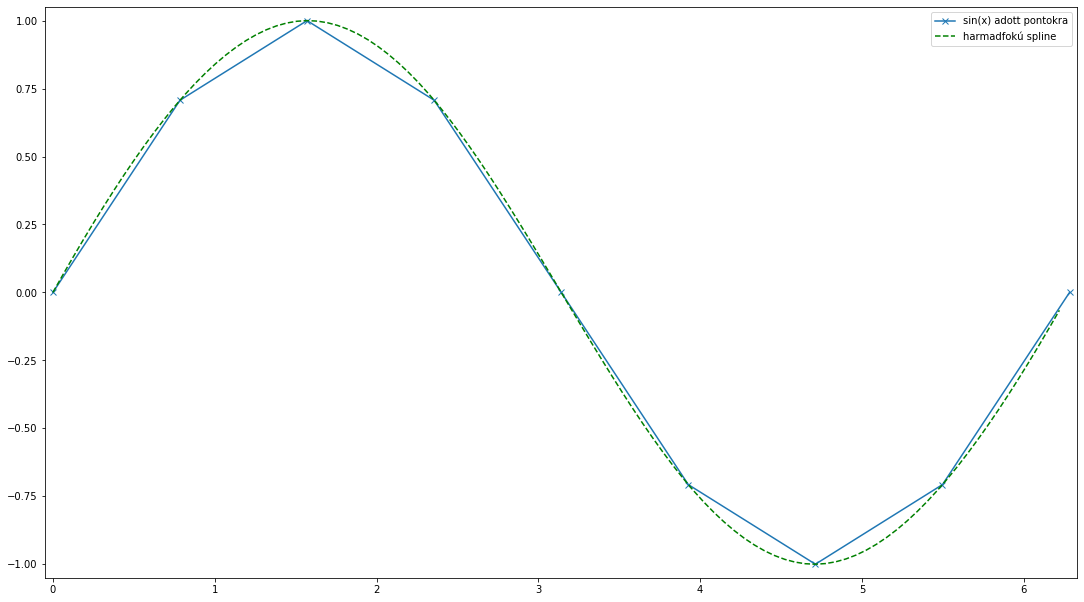

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from matplotlib.pyplot import figure


x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y= np.sin(x)
tck = interpolate.splrep(x, y, s=0)
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)

plt.figure(figsize=(18.5, 10.5))
plt.plot(x, y,'-x',  xnew, ynew,'g--' )
plt.legend(['sin(x) adott pontokra', 'harmadfokú spline'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.show()

Látható hogy a harmadfokó spline jól közelíti a függvényünket hiszen nagyjából lefedi és a megadott pontokban felveszi az értéket a megadott értékeket.

## Hermite interpoláció

A harmadik interpoláció amit csak megemlítek az a Hermite interpoláció. Hermite interpoláció esetén ugyan úgy megvannak az $x_0, x_1, \dots, x_n \in [a,b])$ pontjaink, mint eddig és vannak mellé $m_0, m_1, \dots, m_k \quad (k\leq n) $ multiplicitások is, úgyhogy $ \sum_{i=0}^k m_i=n+1$,  továbbá adottak az $f^{(j)}(xi)=y_{ij}, \quad (i=0,\dots,k \quad\textrm{és}\quad j=0,\dots,m-1)$ értékek is. Feladatunk az, hogy megkeressünk egy n-ed fokú P polinomtot melyre igaz hogy,:
$$
P^{(j)}(xi)=y_{ij}, \quad (i=0,\dots,k \quad\textrm{és}\quad j=0,\dots,m-1)
$$